In [66]:
import numpy as np
import matplotlib.pyplot as plt


def update_opinions(opinions):#更新智能体观点
    new_opinions = np.zeros_like(opinions)
    for i, opinion in enumerate(opinions):
        neighbors = [neighbor for neighbor in opinions if abs(opinion - neighbor) < 1]
        if neighbors: #如果存在邻居
            new_opinions[i] = np.mean(neighbors)
        else: #如果不存在，则保持不变
            new_opinions[i] = opinion
    return new_opinions

def simulate_model(L, agents_num, max_t=15):#迭代模拟
    opinions = np.linspace(0, L, agents_num)  #初始观点在[0, L]上均匀间隔
    opinion_t = []  #存储每次迭代后的观点
    opinion_t.append(opinions.copy())
    for t in range(max_t):
        new_opinions = update_opinions(opinions)
        opinion_t.append(new_opinions.copy())
        opinions = new_opinions
    return np.array(opinion_t)

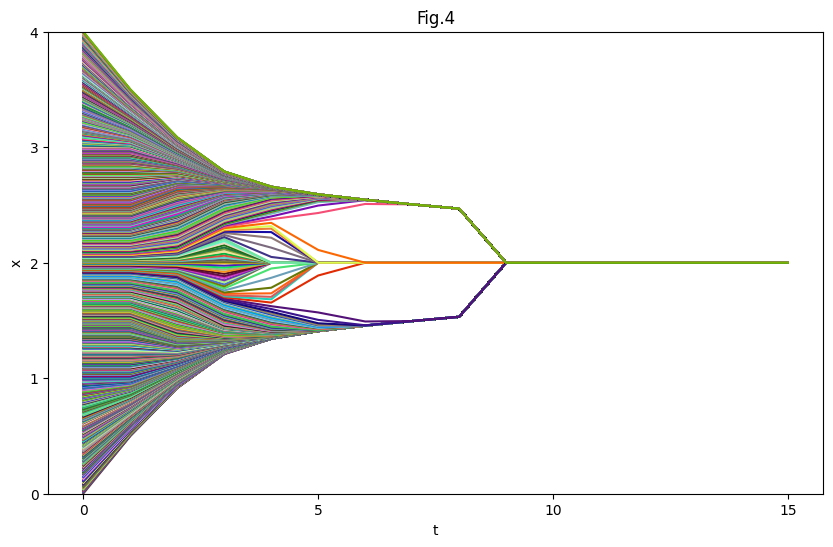

In [67]:

L = 4
agents_num = 1000

opinion_t = simulate_model(L, agents_num)

# 绘制复现图
plt.figure(figsize=(10, 6))
for i in range(agents_num):
    color = np.random.rand(3,)  
    plt.plot(opinion_t[:, i], color=color)
plt.ylim(0, 4)  
plt.yticks(np.arange(0, 5, 1))  
plt.xticks(np.arange(0,20,5))
plt.xlabel('t')
plt.ylabel('x')
plt.title('Fig.4')

plt.show()


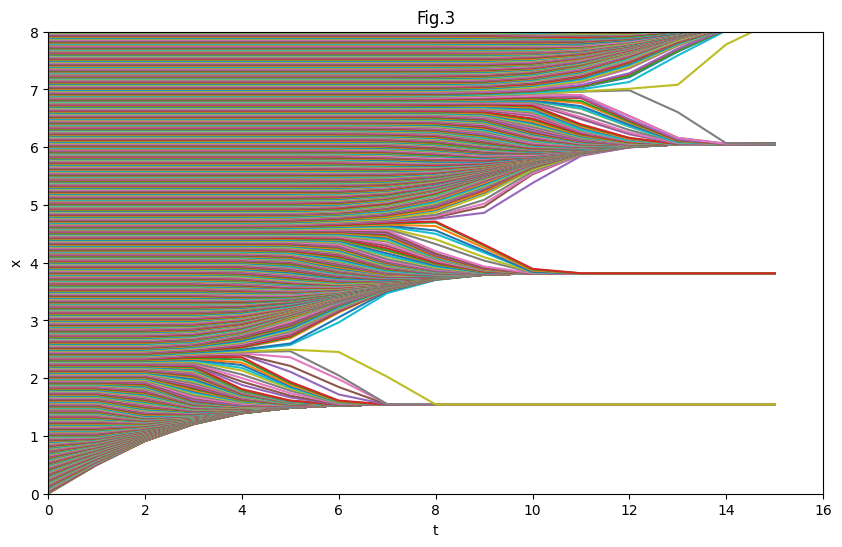

In [68]:
L = 100 
agents_num= 100*L 


opinion_t = simulate_model(L, agents_num)


plt.figure(figsize=(10, 6))
for i in range(opinion_t.shape[1]):
    plt.plot(opinion_t[:, i])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Fig.3')
plt.ylim(0, 8)
plt.xlim(0,16)
plt.show()

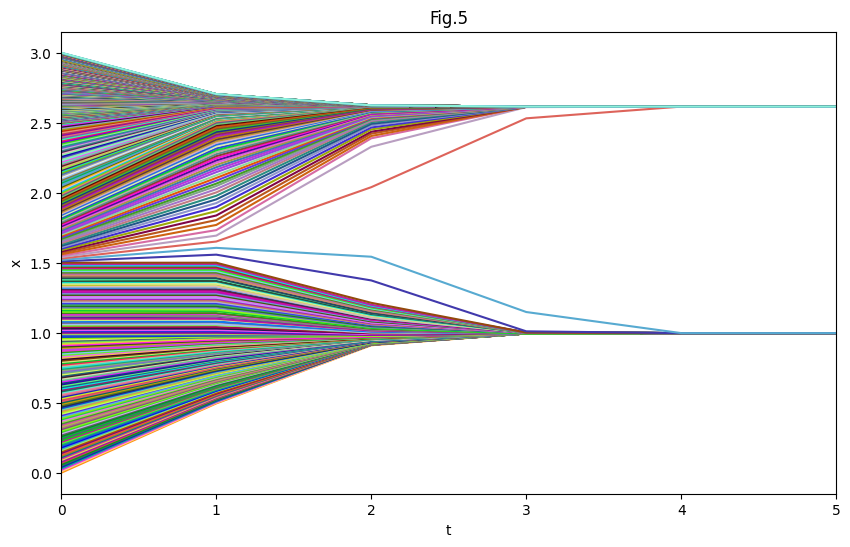

In [69]:
def simulate_model0(opinions, max_t=20):
    opinion_t = []
    opinion_t.append(opinions.copy())
    for t in range(max_t):
        new_opinions = update_opinions(opinions)
        opinion_t.append(new_opinions.copy())
        opinions = new_opinions
    return np.array(opinion_t)
opinions = np.concatenate([np.linspace(0, 2.5, 251), np.linspace(2.5, 3, 500)])


opinion_t = simulate_model0(opinions)


plt.figure(figsize=(10, 6))
for i in range(len(opinions)):
    color = np.random.rand(3,)  
    plt.plot(opinion_t[:, i], color=color)
    
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(0,5)
plt.title('Fig.5')
plt.xticks(np.arange(6))
plt.yticks(np.arange(0, 3.1, 0.5))

plt.show()

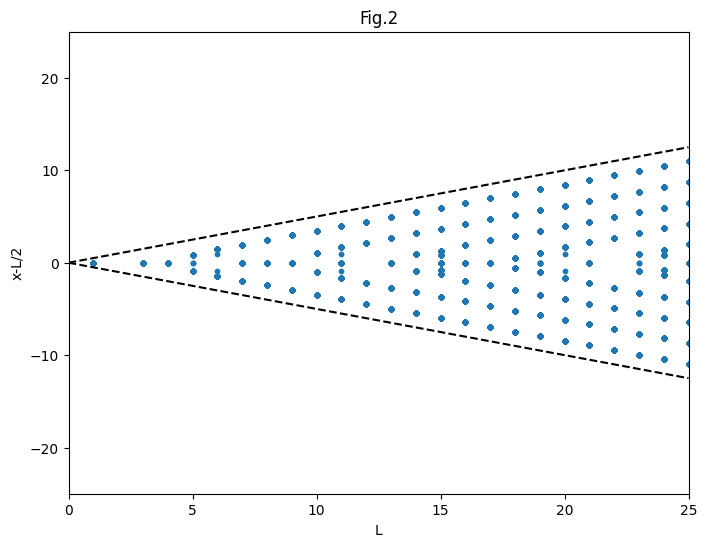

In [70]:
L_values=np.arange(0,26)
max_t=50
x=np.empty(0)
y=np.empty(0)
flag=1
for L in L_values:
    agents_num=500*L
    opinions = np.linspace(0, L, agents_num)
    for t in range(max_t):
        new_opinions = update_opinions(opinions)
        opinions = new_opinions
    for opinion in opinions:
        neighbors = [neighbor for neighbor in opinions if abs(opinion - neighbor) < 1]
        if neighbors:  #检查邻居列表是否为空
            n = np.mean(neighbors)
            if np.any(x == n):  #检查x中是否已经存在n
                continue
            x = np.append(x, L)
            y = np.append(y, n - L * 0.5)
points = np.column_stack((x, y))
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], s=10)  
plt.xlabel('L')
plt.ylabel('x-L/2')
plt.title('Fig.2')
plt.ylim(-25,25)
plt.xlim(0,25)
plt.plot([0, max(L_values)], [0, max(L_values)*0.5], 'k--')
plt.plot([0, max(L_values)], [0, -max(L_values)*0.5], 'k--')
plt.show()